# Project 1: Binary Classification model for the Uninstallation of App


## Problem statement: To build a Binary Classification model, to determine if there is specific set of retailers more likely to uninstall the application compared to others. 


In [42]:
import pandas as pd 
import matplotlib.pyplot as plt 
import time 
import numpy as np 
import seaborn as sns 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from neptunecontrib.monitoring.metrics import log_binary_classification_metrics
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [43]:
#IMPORTING DATASETS
responce_data = pd.read_excel (r'H:\intern_lovelocal\ML_Project\back_up_data\final_dataset_copy_backup.xlsx') #RESPONSE DATASTE
uninstallation_data= pd.read_excel (r'H:\intern_lovelocal\ML_Project\uninstalled_app_dataset\store_id_uninstalled_app_1_col.xlsx') #STORES WHICH UNINSTALLED THE APP




In [44]:
responce_data.head()

,total_orders,average_orders_per_day,average_gap_of_time_in_hours_in_subsequent_orders,ratio_delivered_to_pick_up,total_orders_delivered,total_orders_pickup,avg_delivery_distance_in_metre,avg_basket_size,avg_basket_price,avg_unique_basket_size,...,grocery_or_supermarket,health,hospital,locality,lodging,pharmacy,point_of_interest,political,restaurant,store
0,6712,58.877193,0.408229,190.771429,6677,35,122.089756,3.116063,332.816063,3.073816,...,NaN,3.0,3.0,1,NaN,NaN,18,2,NaN,1.0
1,38,0.487179,50.711917,0.000000,38,0,315.390632,2.111111,185.333333,2.111111,...,NaN,3.0,3.0,1,NaN,NaN,18,2,NaN,1.0
2,934,5.247191,4.581109,92.400000,924,10,63.883911,1.074799,376.498274,1.074799,...,NaN,3.0,3.0,1,NaN,NaN,18,2,NaN,1.0
3,2353,13.219101,1.819067,15.116438,2207,146,226.941565,2.758499,260.164549,2.737397,...,NaN,3.0,3.0,1,NaN,NaN,18,2,NaN,1.0
4,306,2.684211,9.035357,0.000000,306,0,1072.804944,6.120000,564.400000,6.120000,...,NaN,3.0,3.0,1,NaN,NaN,18,2,NaN,1.0


In [45]:
len(responce_data.columns)

36

Total columns = 36

In [46]:
len(responce_data)

1020

Total Number of retail stores= 1020

In [47]:
responce_data.dtypes

total_orders                                           int64
average_orders_per_day                               float64
average_gap_of_time_in_hours_in_subsequent_orders    float64
ratio_delivered_to_pick_up                           float64
total_orders_delivered                                 int64
total_orders_pickup                                    int64
avg_delivery_distance_in_metre                       float64
avg_basket_size                                      float64
avg_basket_price                                     float64
avg_unique_basket_size                               float64
avg_unique_basket_price                              float64
average_diff_btwn_range_of_basket_price              float64
avg_no_of_customers_per_day                          float64
top_five_products_name_max_sale                       object
list_bottom_5_products                                object
freq_goods_category_sold                              object
store_id                

In [48]:
uninstallation_data.head()

,Identity
0,273470.0
1,138791.0
2,503113.0
3,59044.0
4,34884.0


This is the ID of all those stores who have uninstalled the application

### Data cleaning

In [49]:
#REMOVING NON STORE_ID ROWS FROM THE DATASTE
uninstallation_data = uninstallation_data[uninstallation_data['Identity'] < 1000000] 
#ADDING COLUMN IF STORE HAS  UINSTALLED APP (1)OR NOT(0)
responce_data["uninstalled_app"] = np.nan
# FILLING VALUES IN AVERAGE DELIVERY DISTANCE WITH THE MEDIAN OF THE DATA
median_value=responce_data['avg_delivery_distance_in_metre'].median()
#fill null values with 0 in average_delivery_distance Column
responce_data['avg_delivery_distance_in_metre']=responce_data['avg_delivery_distance_in_metre'].fillna(value=0)

responce_data['avg_delivery_distance_in_metre']=responce_data['avg_delivery_distance_in_metre'].fillna(median_value)
#for average gap of time between subsequent orders
median_value=responce_data['average_gap_of_time_in_hours_in_subsequent_orders'].median()
#fill null values with 0 in average_delivery_distance Column
responce_data['average_gap_of_time_in_hours_in_subsequent_orders']=responce_data['average_gap_of_time_in_hours_in_subsequent_orders'].fillna(value=0)

responce_data['average_gap_of_time_in_hours_in_subsequent_orders']=responce_data['average_gap_of_time_in_hours_in_subsequent_orders']

### Adding a Target column, if a store have uninstalled the application as TRUE and if not uninstalled as FALSE

In [51]:
for i in range(len(responce_data)):
    if responce_data['store_id'][i] in uninstallation_data_nparray:
        responce_data['uninstalled_app'][i]= 1
    else:
        responce_data['uninstalled_app'][i]= 0

In [52]:
responce_data.head()

,total_orders,average_orders_per_day,average_gap_of_time_in_hours_in_subsequent_orders,ratio_delivered_to_pick_up,total_orders_delivered,total_orders_pickup,avg_delivery_distance_in_metre,avg_basket_size,avg_basket_price,avg_unique_basket_size,...,health,hospital,locality,lodging,pharmacy,point_of_interest,political,restaurant,store,uninstalled_app
0,6712,58.877193,0.408229,190.771429,6677,35,122.089756,3.116063,332.816063,3.073816,...,3.0,3.0,1,NaN,NaN,18,2,NaN,1.0,1.0
1,38,0.487179,50.711917,0.000000,38,0,315.390632,2.111111,185.333333,2.111111,...,3.0,3.0,1,NaN,NaN,18,2,NaN,1.0,0.0
2,934,5.247191,4.581109,92.400000,924,10,63.883911,1.074799,376.498274,1.074799,...,3.0,3.0,1,NaN,NaN,18,2,NaN,1.0,0.0
3,2353,13.219101,1.819067,15.116438,2207,146,226.941565,2.758499,260.164549,2.737397,...,3.0,3.0,1,NaN,NaN,18,2,NaN,1.0,1.0
4,306,2.684211,9.035357,0.000000,306,0,1072.804944,6.120000,564.400000,6.120000,...,3.0,3.0,1,NaN,NaN,18,2,NaN,1.0,0.0


In [53]:
#MAking X and Y 
y = responce_data['uninstalled_app']
X = responce_data[['total_orders','average_orders_per_day','average_gap_of_time_in_hours_in_subsequent_orders','ratio_delivered_to_pick_up','total_orders_delivered','total_orders_pickup','avg_delivery_distance_in_metre','avg_basket_size','avg_basket_price','avg_unique_basket_size','avg_unique_basket_price','average_diff_btwn_range_of_basket_price','avg_no_of_customers_per_day','atm','bakery','bank','finance','food','gas_station','grocery_or_supermarket','health','hospital','locality','lodging','pharmacy','point_of_interest','political','restaurant','store']]


### Checking if the dataset is Imbalanced

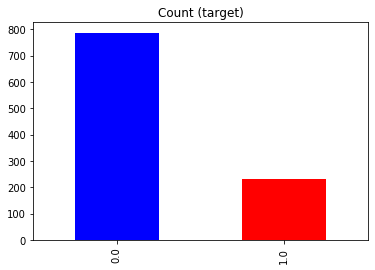

In [30]:
responce_data.uninstalled_app.value_counts().plot(kind='bar', title='Count (target)',color=list('br'));


Hence the dataset is highly imbalanced with only 23% of stores have uninstalled the application and rest 77% retail stores haven't uinstalled the application. 
Hence, the evaluation matrices for the Imbalanced dataset are to be Precision, Recall, AUC-ROC, weighted F1-score.

## Data Preprocessing

In [31]:
#SPLITTING THE DATA INTO TRAIN AND TEST        
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

### Fitting the MODEL

In [32]:
decision_tree = DecisionTreeClassifier()

#Decision Tree¶
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [41]:
dtree_roc

0.6049456765232974

In [40]:
#RADOM FOREST CLAS
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()


In [39]:
forest_roc

0.6615389784946236

### Results: For a new store getting on-boarded after some  transactions made from it we can predict that  if the retailer is going to uninstall the application or not with an accuracy of nearly 66% . 
